# Basic Jupyter Notebook and Data Visualization


This tutorial mainly involves following aspects, which are necessary for you to write a legible report.
* Why and how to use the Jupyter Notebook?
* Markdown: How to use Jupyter Notebook to write a decent report?
* Matplotlib: How to visualize your data?
* Effective Visualization in your project.
* Requirement for your report (Important).


## Why and how to use the Jupyter Notebook?

The Jupyter Notebook is a powerful tool for interactively developing and presenting data science projects. It's a single document where you can run code, display the output, and also add explanations, formulas, and charts, and make your work more transparent, understandable, repeatable, and shareable. 

For more user guide, please refer to https://www.dataquest.io/blog/jupyter-notebook-tutorial/.

## Markdown: How to use Jupyter Notebook to write a decent report?

Markdown is similar to latex. To write a cell, just change the cell from 'code' mode to 'markdown' mode, then you can write markdown and run it! 

Here we give a few examples. For more tutorial material, see [Here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

###  *Headings ----------------------------------------------------------------------------------------------------------------------

# This is a level 1 heading
## This is a level 2 heading
### This is a level 3 heading

### *Fonts ----------------------------------------------------------------------------------------------------------------------------

This is some plain text that forms a paragraph. Add emphasis via **bold** and __bold__, or *italic* and _italic_. 

Paragraphs must be separated by an empty line. 

### *Bullet Points -------------------------------------------------------------------------------------------------------------------

* Sometimes we want to include lists. 
* Which can be bulleted using asterisks. 

1. Lists can also be numbered. 
2. If we want an ordered list.

### *Hyper Links -------------------------------------------------------------------------------------------------------------------

[It is possible to include hyperlinks](https://www.example.com)


### *Code Block -------------------------------------------------------------------------------------------------------------------

Inline code uses single backticks: `foo()`, and code blocks use triple backticks: 
```
bar()
``` 
Or can be indented by 4 spaces: 

    foo()
    
### *LaTex Equations--------------------------------------------------------------------------------------------------------------

* Inline expressions can be added by surrounding the latex code with the money sign:$e^{i\pi} + 1 = 0$.
* Expressions on their own line are surrounded by double mobey signs: $$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$


## Matplotlib: How to visualize your data?

Matplotlib is a multi-platform data visualization library built on NumPy arrays. So here we assume that you are familiar with Numpy, and then we will give a couple of examples to illustrate this plotting tool.

In [1]:
# first make sure you install every package we want by running this cell.
import numpy as np
import matplotlib.pyplot as plt


# set the matlab-style of all the plots. Trivial.
plt.style.use('classic')

Here we give you two examples. Play with each of them and try to change some parameters until you get how to plot well.

### EX1: A MATLAB-style Interface: 

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied. You can get a reference to these using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) routines.

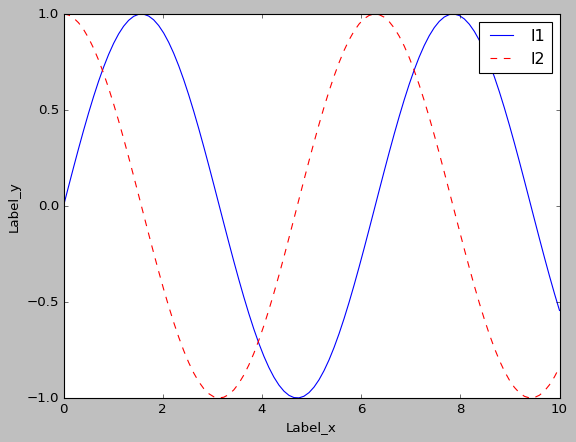

In [2]:

x = np.linspace(0, 10, 100) # create x-data, [0,0.1,0.2...,9.9]

fig = plt.figure() # create a figure

plt.plot(x, np.sin(x), 'b-') # b-: blue line

plt.plot(x, np.cos(x), 'r--'); # r--: red dash

 # please remember the following steps to make a complete figure. 

plt.xlabel('Label_x')

plt.ylabel('Label_y')

plt.legend(['l1','l2'])

### EX2: An object-oriented interface: 

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects. To re-create the previous plot using this style of plotting, you might do the following:

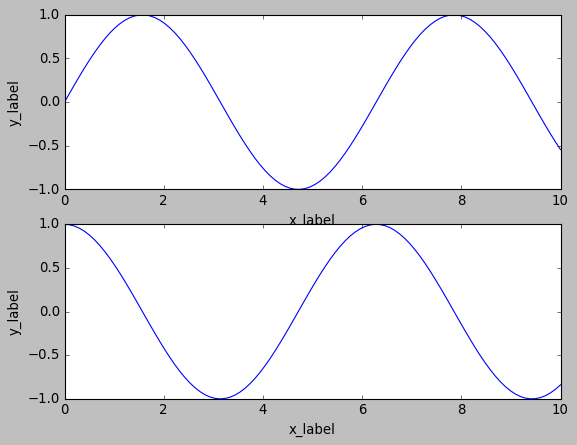

In [3]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
for i in range(2):
    ax[i].set_xlabel('x_label')
    ax[i].set_ylabel('y_label')
    

## Effective Visualization in Your Project

In our case, the data visualization usually includes the following aspects.

* The theoretical value/distribution v.s. the generated value/distribution.

* Random variable transformation: Before transformation v.s. After transformation.

* Results from repetitive simulations. 

For each of the purpose, we will give you a concrete example to illustrate how to do good data visualization.


### EX3: (1D Case) Histogram of a Normal distribution 

Suppose we want to generate a normal distribution with parameter $\mu = 100, \sigma = 15$, and you choose a package to generate the samples. In order to show that you have generated what you want, a natural way to do is:

1. Generate a considerable number of samples and plot a histogram. 
2. Overlay a theoretical value plot. You may find that your curve could not fit onto the histogram. 
    - Before you check the sample generation process, make you that you have normalized the histogram so that you get the density in y axis, not frequency/total numbers. That is, your plot satisfied that the total area of bins equals 1.
 

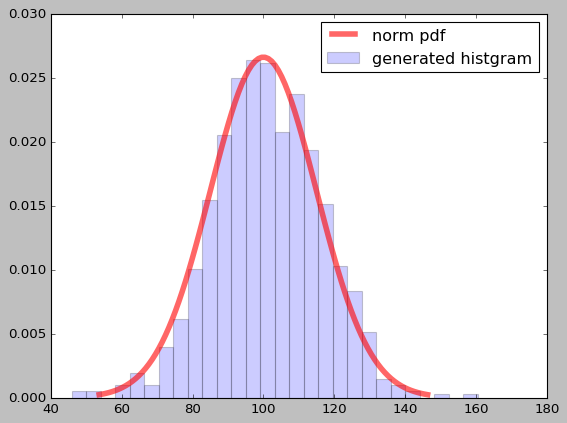

In [4]:
from scipy.stats import norm # we import the scipy package to draw pdf of normal distribution

np.random.seed(19680801)# Fixing random state for reproducibility

fig, ax = plt.subplots(1, 1)# Generate the figure

mu, sigma = 100, 15 #parameter

x = mu + sigma * np.linspace(norm.ppf(0.001), 
                norm.ppf(0.999), 100) 

# plot the theoretical density function
ax.plot(x, norm.pdf(x, loc=mu, scale=sigma),
       'r-', 
        lw=5, # line width
        alpha=0.6, # transparency of plots
        label='norm pdf') 

r =  mu + sigma *norm.rvs(size=1000)
ax.hist(r, bins = 'auto', density=True, 
        alpha=0.2,
        label='generated histgram') # plot the generated histogram
ax.legend()
plt.show()

### EX4: (2D Case) Normal distribution Generator using Box-Muller method with Scatter Plot

suppose you want to generate Gaussian samples in two dimensions i.e. generating samples whose x and y coordinates are independent standard normals (Gaussian with zero mean and standard deviation of 1). Clever as you are, you want to generate the vector $Z = [Z_1, Z_2]$ by two standard independent unif r.v $U_1, U_2$ via Box-Muller method: 

$$
U_1, U_2 \quad i.i.d \sim Unif (0,1) 
$$
We do the tranformation
$$
Z_1 = \sqrt{-2\log(U_1)}cos(2\pi U_2)
$$
$$
Z_2 = \sqrt{-2\log(U_2)}cos(2\pi U_1)
$$

Despite the strong coupling between U₁ and U₂ in each of the two formulas above, the generated $Z_1$ and $Z_2$ coordinates, which are both standard Gaussians, are still surprisingly independent from each other!
$$Z_1,Z_2 \quad i.i.d \sim \mathcal{N}(0,1)$$



(See [This blog](https://medium.com/mti-technology/how-to-generate-gaussian-samples-3951f2203ab0) if you want to dig deeper into this topic! )





The following script give complete example to generate normal r.v.s using Box-Muller and visualize it. 

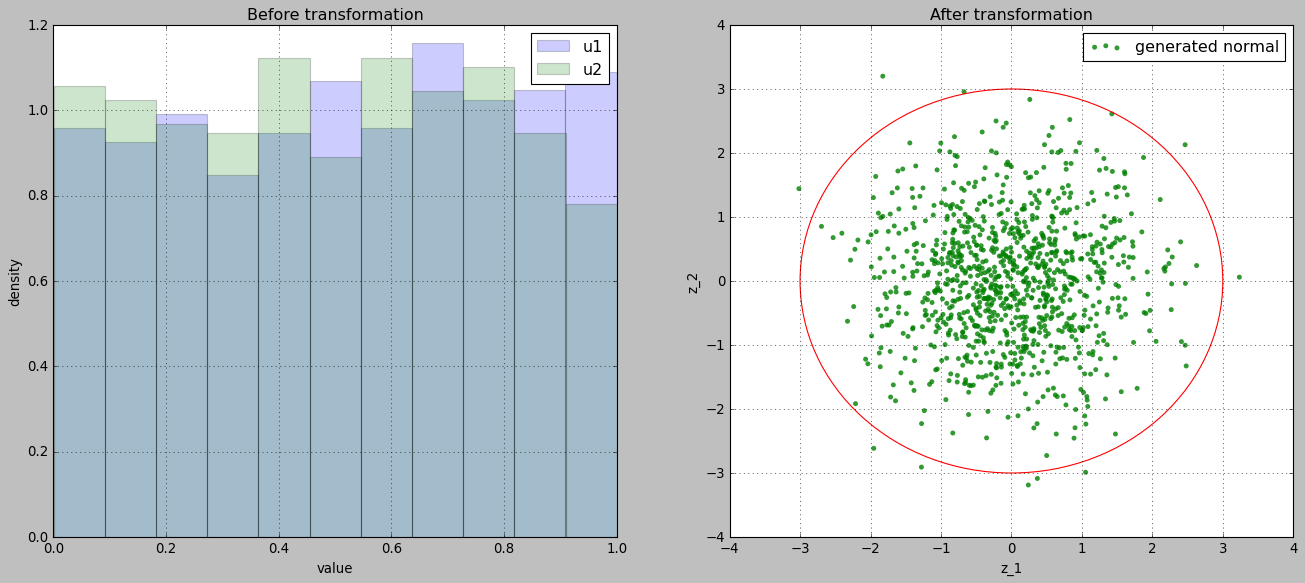

In [5]:
# transformation function
def gaussian(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2


np.random.seed(19680801)
# uniformly distributed values between 0 and 1
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)

# run the transformation
z1,z2 = gaussian(u1,u2)


# plotting the values before and after the transformation
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].hist(u1, bins = 'auto', density=True,alpha=0.2,label='u1') 
ax[0].hist(u2, bins = 'auto', density=True,alpha=0.2,label='u2') 
ax[1].scatter(z1, z2, c='g', s=20, label='generated normal',alpha=0.8, edgecolors='none')

# you can also plot the 3-sigma contour for the joint gaussian [z_1,z_2]
contour = plt.Circle((0, 0), 3, color='r', fill=False)
ax[1].add_artist(contour)

ax[0].set_xlabel('value')
ax[0].set_ylabel('density')
ax[0].title.set_text('Before transformation')
ax[1].set_xlabel('z_1')
ax[1].set_ylabel('z_2')
ax[1].title.set_text('After transformation')
for i in range(2):
    ax[i].legend()
    ax[i].grid(True)

plt.show()



### EX5 How to visualize the repetitive simulation results?

Suppose you tried to estimate the average reward $\hat{\theta_1},\hat{\theta_2}..,\hat{\theta_{10}} $ , you have done simulation for $N = 100$ times, and you have 100 different $\hat{\theta_1},\hat{\theta_2} ..,\hat{\theta_{10}}$. How to represent them? 

Using **error bar** could be a good idea. Often you may be interested in adding error bars to charts in Python to capture uncertainty around measurements or calculated values.

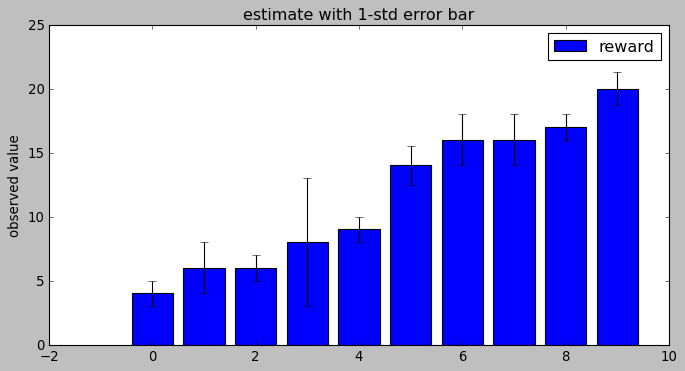

In [6]:
#fake data, you should code to calculate this
data_mean = [4, 6, 6, 8, 9, 14, 16, 16, 17, 20]
#calculate standard error
# std_error = np.std(data, ddof=1) / np.sqrt(len(data))
std_error = [1,2,1,5,1,1.5,2,2,1,1.3]
#define chart 
fig, ax = plt.subplots(figsize=(10,5))

#create chart
ax.bar(x=np.arange(len(data_mean)), #x-coordinates of bars
       height=data_mean, #height of bars
       yerr=std_error, #error bar width
       capsize=4,
       label='reward') #length of error bar caps
ax.set_title('estimate with 1-std error bar')
ax.legend()
ax.set_ylabel('observed value')

plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x246b8aca400>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x246b8aca2e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x246b8acc370>,
 'cbars': <matplotlib.collections.LineCollection at 0x246b8ac0520>}

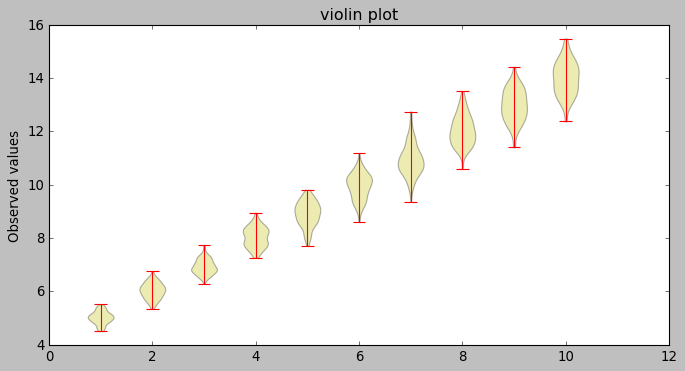

In [7]:
# faked data
data = [sorted(np.random.normal(a, a*0.05, 100)) for a in range(5,15)]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

ax1.set_title('violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)